In [10]:
# vertical IWC distribution
# dduncan 9/1/18
# starting with dardar data which is monthly already and 36+ months,
#  break up into seasons since monthly is too noisy
# updated to 'Merra-2' and small stuff, june 2018
import glob
import scipy.ndimage as ndimage
#from scipy import linalg as LA
dir = '/home/dudavid/projects/iwp/grids/' 
yr = '15'
nx, ny = 144, 72
nz = 23 # common p levels from ERA5/MERRA and subset from DARDAR
plvs = [1000,975,950,925,900,875,850,825,800,775,750,700,650,600,550,\
        500,450,400,350,300,250,200,150,100][::-1]
# chop off bottom layer from dardar to match missing from reanalyses? the
#  dardar data are effectively averages between those layers anyway...
print(nz,len(plvs))
#slices = ['0E_12-15Z','90W_18-21Z','105E_3-6Z']
slices = [r'$(0^o$E)','$(90^o$W)','$(105^o$E)']
sranges = np.array([[-22.5,22.5],[-112.5,-67.5],[82.5,127.5],[-180,180]])
sranges = ((sranges+180))/2.5
print(sranges)
print(slices)

23 24
[[  63.   81.]
 [  27.   45.]
 [ 105.  123.]
 [   0.  144.]]
['$(0^o$E)', '$(90^o$W)', '$(105^o$E)']


In [11]:
# Just doing daytime DARDAR from one year, getting mean daytime profile slices
# DARDAR data are gridded from SP to NP, so flip for comparison to ERA/MERRA which start at NP
dcts = sorted(glob.glob(dir+'dardar.nsmo0.day.144x.72y.iwc.v2.'+yr+'*.cts.npy'))
dtot = sorted(glob.glob(dir+'dardar.nsmo0.day.144x.72y.iwc.v2.'+yr+'*.tot.npy'))
#dtot = sorted(glob.glob(dir+'dardar.nsmo0.day.144x.72y.iwc.v2.15*.totd.npy')) #btm layer is >1000hPa, discard
#dcts = sorted(glob.glob(dir+'dardar.day.144x.72y.iwc.v1.15*.cts.npy'))
#dtot = sorted(glob.glob(dir+'dardar.day.144x.72y.iwc.v1.15*.totd.npy'))
#darcounts = np.zeros([ny,nx])
#dartotss  = np.zeros([nz,ny,nx])
#nyrs = 5
#darcountm = np.zeros([4*nyrs,ny,nx])
#dartotsm  = np.zeros([4*nyrs,ny,nx])
#nz = 267 # trying out native dardar vertical grid
darcount = np.zeros([ny,nx])
dartots  = np.zeros([nz,ny,nx])
ndar = len(dtot)
print('number dardar monthly files used: ',ndar)
if ndar != len(dtot): print('unequal!')
    
#darseas = np.zeros([4,ny,nx])
#darseam = np.zeros([4*nyrs,ny,nx])
darmean = np.zeros([nz,ny,nx])
for d in range(ndar):
    dc = np.load(dcts[d])
    dt = np.load(dtot[d])[1:nz+1,:,:]
    #mo = dtot[d][len(dtot[d])-13:len(dtot[d])-11] # string month number
    darcount[:,:]  += dc
    dartots[:,:,:] += dt * 1000.0 # from kg into g
#print(np.shape(dt))
print(info(dartots))
    
darmean = np.zeros([nz,ny,nx])
dargmean = np.zeros([nz,ny])
nonz = [darcount > 0]
darcl = np.sum(darcount,axis=1)
print(darcl)
nonzl= [darcl > 0]
print(np.shape(nonzl),np.shape(darcl))
for z in range(nz):
    tempdt = dartots[z,:,:]
    tempdt[nonz] = tempdt[nonz]/darcount[nonz]
    darmean[z,:,:] = tempdt  # mean of all data
    tempdt = dartots[z,:,:]
#    tempg = np.nansum(dartots[z,:,:],axis=1)
#    tempg[nonzl] = tempg[nonzl]#/darcl[nonzl]
#    dargmean[z,:] = tempg
#print(dargmean[12,:])
    
#iwp_czech = np.sum(darmean,axis=0)*60.0
#print(info(iwp_czech))
#print(np.mean(iwp_czech,axis=1))
#grdmap(np.flipud(iwp_czech),-180,90,1,250,1)
#print(info(darmean[nz-7,:,:]))

darsubs = np.zeros([nz,ny,4])
for x in range(4):
    darsubs[:,:,x] = np.fliplr(1e3*np.mean(darmean[:,:,int(sranges[x,0]):int(sranges[x,1])],axis=2))
    # convert to mg/m^3 like the reanalyses
#print(info(darsubs[nz-7,:,:]))

#f27 = plt.figure(figsize=[9,15])
#grdmap(np.flipud(darmean[2,:,:]*1000.0),-180,90,.1,30,1,'IWC '+str(plvs[2]))
#f28 = plt.figure(figsize=[9,15])
#grdmap(np.flipud(darmean[7,:,:]*1000.0),-180,90,.1,30,1,'IWC '+str(plvs[7]))
#f26 = plt.figure(figsize=[9,15])
#grdmap(np.flipud(darmean[10,:,:]*1000.0),-180,90,.1,30,1,'IWC '+str(plvs[10]))
#f29 = plt.figure(figsize=[9,15])
#grdmap(np.flipud(darmean[18,:,:]*1000.0),-180,90,.1,30,1,'IWC '+str(plvs[18]))

number dardar monthly files used:  12
['0.00E+2', '1.00E+3', '4.66E+1', '8.38E+1']
[       0.        0.        0.  1870978.  1167064.   983018.   892906.
   820469.   723895.   707050.   721344.   747627.   783906.   852496.
   868839.   863488.   858842.   845855.   826327.   814621.   806113.
   802573.   803581.   803618.   789373.   783038.   781673.   780389.
   779420.   777946.   772562.   767050.   764294.   766243.   767962.
   765086.   761795.   759797.   758824.   757646.   756655.   755699.
   754691.   756436.   760729.   764434.   768853.   774559.   786188.
   797605.   802900.   810501.   821713.   842897.   849999.   853390.
   858161.   863155.   922764.  1000634.  1054936.  1107728.  1159153.
  1240761.  1314368.  1293387.  1348605.  1555924.  2422584.        0.
        0.        0.]
(1, 72) (72,)


In [12]:
# read in MERRA and ERA5 grids from makegrid_*_vert
#  all data should be in mg/m^3 on the same vertical levels used by in DARDAR analysis
oerai = np.load('grids/era5.vert.3.73y.13.5LST.iwp.swp.v2.15.365.grid.npy')
oeras = np.load('grids/era5.vert.3.73y.13.5LST.iwp.swp.v2.15.365.sgrid.npy')
omri  = np.load('grids/merra.vert.3.73y.13.5LST.iwp.v2.15.365.grid.npy')
#print(np.shape(omri),np.shape(oerai))
# interpolate so the grid match exactly
erai = np.zeros([nz,ny,3])
eras = np.zeros([nz,ny,3])
mri = np.zeros([nz,ny,3])
for x in range(3):
    for z in range(nz):
        for y in range(ny):
            erai[z,y,x] = (oerai[z,y,x] + oerai[z,y+1,x])*.5
            eras[z,y,x] = (oeras[z,y,x] + oeras[z,y+1,x])*.5
            mri[z,y,x]  = (omri[z,y,x] + omri[z,y+1,x])*.5
print(np.shape(mri),np.shape(eras),np.shape(darsubs))  # should be on exact same grid (2.5deg, 90S to 90N, same longitude bands)
#print(np.sum(.001*darsubs[:,0:ny,3]*60.,axis=0)) # should be zonal IWPs in g/m^2

(23, 72, 3) (23, 72, 3) (23, 72, 4)


In [13]:
#ml0,ml2=-90,90
z1,z2 = 2,42 #16 # -- dont think this matters other than aspect ratio of plot
ml1,ml2=60,-60 #90,90
s1,s2 = 12,ny-12 #0,ny # should match ml1/ml2 above
#s1,s2 = 0,ny #0,ny # should match ml1/ml2 above
vmi,vma = .10,60
nxt,nyt = 5,11
vr = 'v4' #v2 is separating total vs ciwc alone, v3 updates colorbar and grid lines
#yticks = [str(plvs[i*2]) for i in range(int(nz/2))]
#print(yticks)

f1 = plt.figure(figsize=[13,5])
#grdplt((np.flipud(darsubs[:21,s1:s2,3])),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'DARDAR GLOBAL','$IWC [mg/m^3]$')
#grdplt((np.flipud(dargmean[:,s1:s2])),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'DARDAR GLOBAL','$IWC [mg/m^3]$')
#f1.savefig('img/vert/dardar.20'+yr+'.global.vert.'+vr+'.jpg',dpi=400)


['60$^o$N', '30$^o$N', '0', '30$^o$S', '60$^o$S'] ['950', '850', '750', '550', '350', '150']


/home/dudavid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in less
/home/dudavid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


/home/dudavid/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


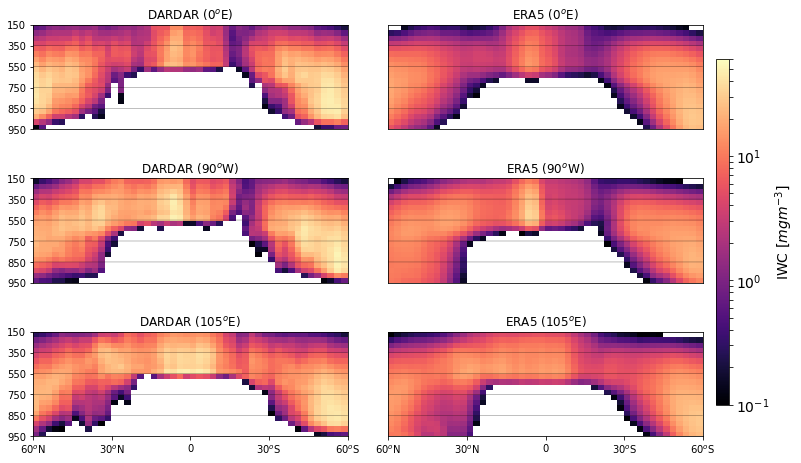

In [14]:
 # multipanel plot for mean IWC profile through slice
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib
cmap = cm.magma
cmap.set_bad('white',1.0) # nans should be white in output
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[12,8]) #width,height
plt.subplots_adjust(wspace=0.13)

vmip = vmi #.001
xl,yl = [30,0,-30],[10,18,26,34]

ys, xs = np.shape(darsubs[2:,s1:s2,3]) # grid size x/y size of grid
#print(ys,xs)
lons = np.linspace(ml1,ml2,xs+1)
lats = np.linspace(z1,z2,ys) #?
#print(lons,lats)
#print(yx[:,:,233])
lomin,lomax,lamin,lamax = ml1,ml2,z1,z2
#ytcks = ['1000','950','900','850','800','750','650','550','450','350','250','150'][::2]
ytcks = ['950','900','850','800','750','650','550','450','350','250','150'][::2]
ytvs  = np.linspace(lats[0],lats[ys-1],nyt)[::2]
xtvs  = np.linspace(lons[0],lons[xs],nxt)
#xtvs  = np.linspace(lons[0],lons[xs-1],nxt)
xtcks = [str(int(i)) for i in xtvs]
for t in range(len(xtcks)):
    xtmp = xtcks[t]
    if np.sign(float(xtcks[t])) == -1: xtmp = str(abs(int(xtcks[t])))+'$^o$S'
    if np.sign(float(xtcks[t])) ==  1: xtmp = str(abs(int(xtcks[t])))+'$^o$N'
    xtcks[t] = xtmp
print(xtcks,ytcks)
    #cb = m.colorbar()
    #plt.ylabel('Pressure [hPa]')
darsubs[darsubs < vmip] = np.nan
mri[mri < vmip] = np.nan
eras[(eras+erai) < vmip] = np.nan
#erai[erai < vmip] = np.nan
for sl in range(3):
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
                urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,0])
    m.drawparallels(yl,linewidth=.5)
    #m.drawmeridians(xl,linewidth=.5)#, m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    gpl = np.flipud(darsubs[:21,s1:s2,sl])
    gpl = np.ma.array(gpl,mask=np.isnan(gpl))#mri[:,s1:s2,sl]))
    #print(np.shape(gpl),np.shape(x),np.shape(y))
    m.pcolormesh(x,y,gpl,norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
    ax[sl,0].set_title('DARDAR '+slices[sl])
    if sl==2:
        ax[sl,0].set_xticks(xtvs)
        ax[sl,0].set_xticklabels(xtcks)
    ax[sl,0].set_yticks(ytvs)
    ax[sl,0].set_yticklabels(ytcks)
    
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
                urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,1])
    m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    gpl = eras[2:,s1:s2,sl] + erai[2:,s1:s2,sl]  ## BOTH!
    gpl = np.ma.array(gpl,mask=np.isnan(gpl))#mri[:,s1:s2,sl]))
    m.pcolormesh(x,y,gpl,norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
    ax[sl,1].set_title('ERA5 '+slices[sl])
    if sl==2:
        ax[sl,1].set_xticks(xtvs)
        ax[sl,1].set_xticklabels(xtcks)
    #ax[sl,1].set_yticks(ytvs)
    #ax[sl,1].set_yticklabels(ytcks)
    
#    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
#                urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,2])
#    x, y = m(lons, lats)
#    gpl = mri[2:,s1:s2,sl]
#    gpl = np.ma.array(gpl,mask=np.isnan(gpl))#mri[:,s1:s2,sl]))
#    m.pcolormesh(x,y,gpl,norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
#    ax[sl,2].set_title('MERRA '+slices[sl])
#    if sl==2:
#        ax[sl,2].set_xticks(xtvs)
#        ax[sl,2].set_xticklabels(xtcks)
    
#cax = fig.add_axes([0.215, 0.075, 0.6, 0.018])
cax = fig.add_axes([0.915, 0.2, 0.015, 0.6]) #works for vertical...
im = ax[1,1].imshow([[1, 2], [2, 3]], norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='vertical')
#cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='horizontal')
cb.set_label(r'IWC $[mg m^{-3}]$',fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()
fig.savefig('img/vert/all_meanslices_6panel_'+vr+'.png',dpi=300,bbox_inches='tight')
    

/home/dudavid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """
/home/dudavid/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


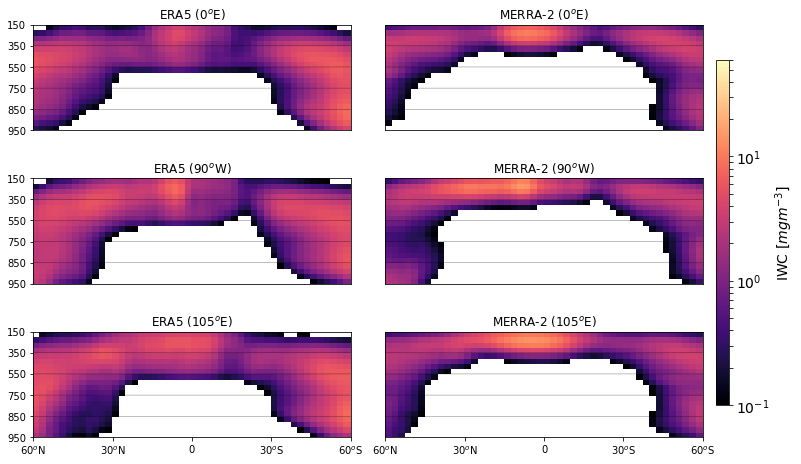

In [15]:
 # multipanel plot for mean IWC profile through slice -- 
    #same as above but just for CIWC (MERRA and ERA5)
fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[12,8]) #width,height
plt.subplots_adjust(wspace=0.11)
erai[erai < vmip] = np.nan
for sl in range(3):
    
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
                urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,0])
    m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    gpl = erai[2:,s1:s2,sl]  ## CIWC only
    gpl = np.ma.array(gpl,mask=np.isnan(gpl))
    m.pcolormesh(x,y,gpl,norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
    ax[sl,0].set_title('ERA5 '+slices[sl])
    if sl==2:
        ax[sl,0].set_xticks(xtvs)
        ax[sl,0].set_xticklabels(xtcks)
    ax[sl,0].set_yticks(ytvs)
    ax[sl,0].set_yticklabels(ytcks)
    
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
                urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,1])
    m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    gpl = mri[2:,s1:s2,sl]
    gpl = np.ma.array(gpl,mask=np.isnan(gpl))#mri[:,s1:s2,sl]))
    m.pcolormesh(x,y,gpl,norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
    ax[sl,1].set_title('MERRA-2 '+slices[sl])
    if sl==2:
        ax[sl,1].set_xticks(xtvs)
        ax[sl,1].set_xticklabels(xtcks)
    #ax[sl,2].set_yticks(ytvs)
    #ax[sl,2].set_yticklabels(ytcks)
    
cax = fig.add_axes([0.915, 0.2, 0.015, 0.6]) #works for vertical...
im = ax[1,1].imshow([[1, 2], [2, 3]], norm=colors.LogNorm(vmin=vmi,vmax=vma),cmap=cmap)
cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='vertical')
#cax = fig.add_axes([0.215, 0.06, 0.6, 0.03])
cb.set_label(r'IWC $[mg m^{-3}]$',fontsize=14)
cb.ax.tick_params(labelsize=14)
plt.show()
fig.savefig('img/vert/all_meanslices_ci_6panel_'+vr+'.png',dpi=300,bbox_inches='tight')
    

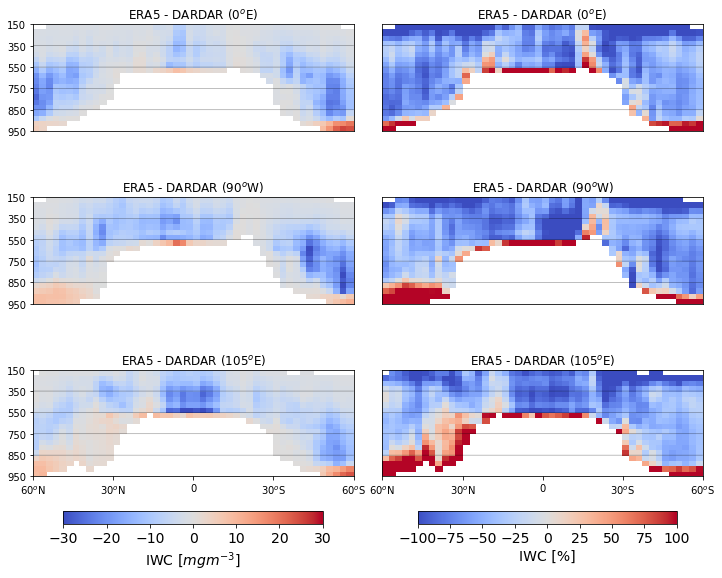

In [16]:
# and now for differences in a multipanel plots:
vm = 30
dif1 = ((eras[2:,s1:s2,0]+erai[2:,s1:s2,0]) - np.flipud(darsubs[:21,s1:s2,0]))#/\
 #((eras[2:,s1:s2,0]+erai[2:,s1:s2,0])*.5 + np.flipud(darsubs[:21,s1:s2,0])*.5)*100
dif2 = ((eras[2:,s1:s2,1]+erai[2:,s1:s2,1]) - np.flipud(darsubs[:21,s1:s2,1]))#/\
 #((eras[2:,s1:s2,1]+erai[2:,s1:s2,1])*.5 + np.flipud(darsubs[:21,s1:s2,1])*.5)*100
dif3 = ((eras[2:,s1:s2,2]+erai[2:,s1:s2,2]) - np.flipud(darsubs[:21,s1:s2,2]))#/\
 #((eras[2:,s1:s2,2]+erai[2:,s1:s2,2])*.5 + np.flipud(darsubs[:21,s1:s2,2])*.5)*100
difz = [dif1,dif2,dif3]
dif1p = ((eras[2:,s1:s2,0]+erai[2:,s1:s2,0]) - np.flipud(darsubs[:21,s1:s2,0]))/\
 ((eras[2:,s1:s2,0]+erai[2:,s1:s2,0])*.5 + np.flipud(darsubs[:21,s1:s2,0])*.5)*100
dif2p = ((eras[2:,s1:s2,1]+erai[2:,s1:s2,1]) - np.flipud(darsubs[:21,s1:s2,1]))/\
 ((eras[2:,s1:s2,1]+erai[2:,s1:s2,1])*.5 + np.flipud(darsubs[:21,s1:s2,1])*.5)*100
dif3p = ((eras[2:,s1:s2,2]+erai[2:,s1:s2,2]) - np.flipud(darsubs[:21,s1:s2,2]))/\
 ((eras[2:,s1:s2,2]+erai[2:,s1:s2,2])*.5 + np.flipud(darsubs[:21,s1:s2,2])*.5)*100
difzp = [dif1p,dif2p,dif3p]
#ytcks = ['950','900','850','800','750','650','550','450','350','250','150'][::1]
#ytvs  = np.linspace(lats[0],lats[ys-2],nyt)[::1]

#fig,ax = plt.subplots(nrows=3, ncols=1, figsize=[7,9]) #width,height
#plt.subplots_adjust(wspace=0.09)
#vr='vp2'

acmap = cm.coolwarm
#for sl in range(3):
#    dif = difz[sl]
#    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
#            urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl])
#    x, y = m(lons, lats)
#    m.pcolormesh(x,y,dif,vmin=-vm,vmax=vm,cmap=acmap)
#    ax[sl].set_title('ERA5 - DARDAR '+slices[sl])
#    ax[sl].set_yticks(ytvs)
#    ax[sl].set_yticklabels(ytcks)
#    if sl==2:
#        ax[sl].set_xticks(xtvs)
#        ax[sl].set_xticklabels(xtcks)
#cax = fig.add_axes([0.215, 0.05, 0.6, 0.02])
##cax = fig.add_axes([0.93, 0.25, 0.02, 0.5]) #works for vertical...
#im = ax[1].imshow([[1, 2], [2, 3]], vmin=-vm,vmax=vm,cmap=acmap)
#cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='horizontal')
#cb.set_label(r'IWC $[mg m^{-3}]$')
#plt.show()
#fig.savefig('img/vert/all_difslices_3panel_'+vr+'.jpg',dpi=450)
#plt.show()

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[12,9]) #width,height
plt.subplots_adjust(wspace=0.09)
#vr='vp2'

vmp = 100 # %
acmap = cm.coolwarm
for sl in range(3):
    dif = difz[sl]
    difp = difzp[sl]
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
            urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,0])
    m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    m.pcolormesh(x,y,dif,vmin=-vm,vmax=vm,cmap=acmap)
    ax[sl,0].set_title('ERA5 - DARDAR '+slices[sl])
    ax[sl,0].set_yticks(ytvs)
    ax[sl,0].set_yticklabels(ytcks,fontsize=10)
    if sl==2:
        ax[sl,0].set_xticks(xtvs)
        ax[sl,0].set_xticklabels(xtcks,fontsize=10)
        
    m = Basemap(projection='cyl',resolution='l',llcrnrlat=lamin,\
            urcrnrlat=lamax,llcrnrlon=lomin,urcrnrlon=lomax,ax=ax[sl,1])
    m.drawparallels(yl,linewidth=.5)
    x, y = m(lons, lats)
    m.pcolormesh(x,y,difp,vmin=-vmp,vmax=vmp,cmap=acmap)
    ax[sl,1].set_title('ERA5 - DARDAR '+slices[sl])
    #ax[sl].set_yticks(ytvs)
    #ax[sl].set_yticklabels(ytcks)
    if sl==2:
        ax[sl,1].set_xticks(xtvs)
        ax[sl,1].set_xticklabels(xtcks,fontsize=10)
        
cax = fig.add_axes([0.16, 0.08, 0.3, 0.02])
im = ax[1,0].imshow([[1, 2], [2, 3]], vmin=-vm,vmax=vm,cmap=acmap)
cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='horizontal')
cb.set_label(r'IWC $[mg m^{-3}]$',fontsize=14)
cb.ax.tick_params(labelsize=14)
cax = fig.add_axes([0.57, 0.08, 0.3, 0.02])
im = ax[1,1].imshow([[1, 2], [2, 3]], vmin=-vmp,vmax=vmp,cmap=acmap)
cb = plt.colorbar(im, cax=cax, cmap=cmap, orientation='horizontal')
cb.set_label('IWC [%]',fontsize=14)
cb.ax.tick_params(labelsize=14)
fig.savefig('img/vert/all_difslices_6panel_'+vr+'.png',dpi=300,bbox_inches='tight')
plt.show()

In [8]:

#for sl in range(3):
#    f11 = plt.figure(figsize=[13,5])
#    grdplt(np.flipud(darsubs[:,s1:s2,sl]),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'DARDAR '+slices[sl],'$IWC [mg/m^3]$')
#    f11.savefig('img/vert/dardar.20'+yr+'.'+slices[sl]+'.vert.'+vr+'.jpg',dpi=400)
#    f12 = plt.figure(figsize=[13,5])
#    grdplt((mri[:,s1:s2,sl]),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'MERRA '+slices[sl],r'$IWC [mg/m^3]$')
#    f12.savefig('img/vert/merra.20'+yr+'.'+slices[sl]+'.vert.'+vr+'.jpg',dpi=400)
    #f13 = plt.figure(figsize=[13,5])
    #grdplt((erai[:,s1:s2,sl]),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'ERA5 '+slices[sl],r'$IWC [mg/m^3]$')
    #f13.savefig('img/vert/era5i.20'+yr+'.'+slices[sl]+'.vert.'+vr+'.jpg',dpi=400)
    #f14 = plt.figure(figsize=[13,5])
    #grdplt(eras[:,s1:s2,sl],ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,'ERA5 '+slices[sl],r'$SWC [mg/m^3]$')
    #f14.savefig('img/vert/era5s.20'+yr+'.'+slices[sl]+'.vert.'+vr+'.jpg',dpi=400)
#    f15 = plt.figure(figsize=[13,5])
#    grdplt((eras[:,s1:s2,sl]+erai[:,s1:s2,sl]),ml1,ml2,z1,z2,vmi,vma,1,nxt,nyt,\
#           'ERA5 '+slices[sl],r'$SWC+IWC [mg/m^3]$')
#    f15.savefig('img/vert/era5si.20'+yr+'.'+slices[sl]+'.vert.'+vr+'.jpg',dpi=400)

#fig = plt.figure(figsize=[5,15])
#grdplt(darsubs[:,:,0],)

In [9]:
# check to see if IWP values make sense with values computed elsewhere
# eras/erai/mri [z,y,3]
#thing = np.zeros([ny,3])
#for y in range(ny):
#  for n in range(3):
#    thing[y,n] = np.nansum(.001*mri[:,y,n] * dz[:]) #back to g
#print(thing[:,0])
#print(thing[:,1])
#print(thing[:,2])